In [1]:
# DO NOT RUN THIS CELL MULTIPLE TIMES!
if "is_run" not in locals():
    #!ls
    %cd ..
    import os
    import sys
    from pathlib import Path
    import json
    import numpy as np
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem import PandasTools
    from rdkit.Chem import Descriptors
    from rdkit import DataStructs
    from rdkit.Chem.rdmolfiles import MaeMolSupplier
    from rdkit.Chem import Draw

    # from rdkit.Chem.Draw import rdDepictor
    from rdkit.Chem.Draw import IPythonConsole
    from rdkit import rdBase
    from rdkit import RDConfig

    # from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole

    IPythonConsole.ipython_useSVG = (
        True  # < set this to False if you want PNGs instead of SVGs
    )
    # dir(IPythonConsole)
    IPythonConsole.molSize = (900, 300)  # (450, 150)
    IPythonConsole.drawOptions.addStereoAnnotation = True
    IPythonConsole.drawOptions.annotationFontScale = 1.5
    # IPythonConsole.drawOptions.minFontSize=15
    # sys.path.append('../')
    sys.path.append("./libs")
    import src
    from PepLibGen.StructGen import StructGen as sg

    # Which rdkit version?
    # print(rdBase.rdkitVersion)
    is_run = True
    from src.utils import dotdict

/biggin/b147/univ4859/research/03_macroconf


### Compound 49

id Macroconf-v2 excel file: 49

reference no: 13

name of the structure (number) in the reference: 

In [2]:
index = 49
with open(f"./data/interim/refactor-test/{index}/data.json", "r") as f:
    compound = json.load(f)

compound = dotdict(compound)
compound.keys()

dict_keys(['index', 'solvent', 'seq_length', 'bonds', 'sequence', 'sequence_1', 'natural_cyclic_peptide', 'non_natural_cyclic_peptide', 'multi', 'distinction', 'smile'])

In [3]:
compound.sequence_1

'RGDFPG'

In [4]:
pdb_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.pdb"
)
mol_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.mol2"
)

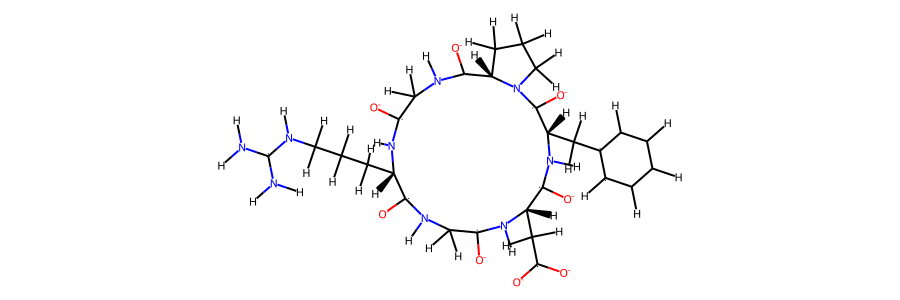

In [5]:
# Read in pdb file from amber
# mol_ref = Chem.MolFromPDBFile(pdb_amber, removeHs=False, proximityBonding=True) #removeHs=True, proximityBonding=True)
mol_ref = Chem.MolFromMol2File(
    mol_amber,
    removeHs=False,
)
mol_ref.RemoveAllConformers()
mol_ref

In [6]:
mol_ref.GetNumAtoms()

84

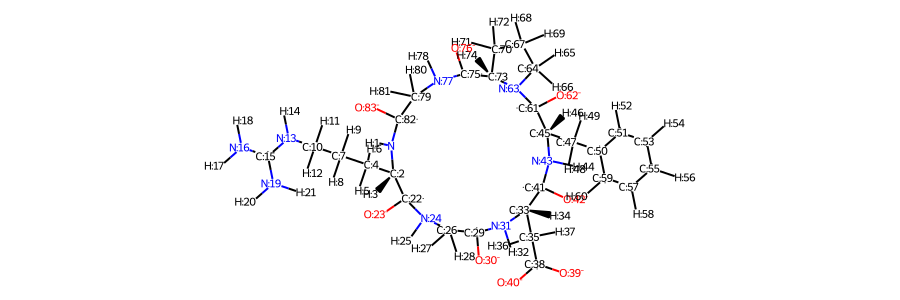

In [7]:
src.utils.mol_with_atom_index(mol_ref)

In [8]:
# Now the NOE assignment starts. Follow the instructions when running the below cells.
# Need to provide a csv file with the NOEs from the paper. The first two colums must be atom names, further columns
# should contain distances. The format can be specified below: D: distance, A: mAximum, I: mInimum, -: do not use.
# Also provide a scaling factor, s.t the NOEs are converted to Angstrom.

In [9]:
hist = {
    "Arg1 Ha": [2],
    "Gly2 NH": [24],
    "Pro5 HbproS": [70],
    "Pro5 Ha": [73],
    "Asp3 Ha": [33],
    "Phe4 NH": [43],
    "Arg1 NH": [1],
    "Arg1 H2b*": [4],
    "Pro5 HbproR": [70],
    "Gly6 H2a*": [79],
    "Asp3 H2b*": [35],
    "Gly6 NH": [77],
    "Asp3 NH": [31],
    "Arg1 H2y*": [7],
    " Arg1 Ha": [2],
    "Phe4 Ha": [45],
    "Pro5 H2d*": [64],
    "Pro5 H2b*": [70],
    "Phe4 HbproR": [47],
    "Gly2 HaproS": [26],
    "Phe4 HbproS": [47],
}
style = "AI-"
scaling = 0.01
# what seems off:

In [10]:
csv = "./data/external/22-09-2021_MacroConf-v2.1/papers/13/49_trans.csv"
# NOE_a, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)
NOE_a, *_ = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

   Atom 1    Atom 2  NMR exp  lower bound  upper bound
0    (1,)      (3,)      0.0         2.76         2.78
1    (1,)    (5, 6)      0.0         3.10         4.06
2    (1,)     (74,)      0.0         3.60         3.80
3    (1,)  (80, 81)      0.0         3.10         4.20
4    (3,)    (5, 6)      0.0         2.40         3.34
5    (3,)    (8, 9)      0.0         2.85         3.84
6   (25,)  (27, 28)      0.0         2.44         2.70
7   (32,)     (34,)      0.0         2.72         2.84
8   (32,)  (36, 37)      0.0         2.52         3.42
9   (32,)     (44,)      0.0         2.40         2.57
10  (34,)  (36, 37)      0.0         2.49         3.39
11  (44,)     (34,)      0.0         3.00         3.14
12  (44,)     (46,)      0.0         2.64         2.66
13  (44,)  (48, 49)      0.0         2.45         2.62
14  (44,)  (48, 49)      0.0         3.08         3.36
15  (46,)  (65, 66)      0.0         2.13         4.30
16  (46,)  (48, 49)      0.0         2.67         2.97
17  (46,) 

In [11]:
# now again for case b

In [12]:
hist = {
    "Arg1 Ha": [2],
    "Gly2 NH": [24],
    "Pro5 HbproS": [70],
    "Pro5 Ha": [73],
    "Asp3 Ha": [33],
    "Phe4 NH": [43],
    "Arg1 NH": [1],
    "Arg1 H2b*": [4],
    "Pro5 HbproR": [70],
    "Gly6 H2a*": [79],
    "Asp3 H2b*": [35],
    "Gly6 NH": [77],
    "Asp3 NH": [31],
    "Arg1 H2y*": [7],
    " Arg1 Ha": [2],
    "Phe4 Ha": [45],
    "Pro5 H2d*": [64],
    "Pro5 H2b*": [70],
    "Phe4 HbproR": [47],
    "Gly2 HaproS": [26],
    "Phe4 HbproS": [47],
    "Gly6 HaproS": [79],
    "Gly6 HaproR": [79],
    "Arg1 HbproR": [4],
    "Arg1 HbproS": [4],
    "Gly2 HaproR": [26],
    "Gly2 HaproS": [26],
    "Asp3 HbproR": [35],
    "Asp3 HbproS": [35],
}
style = "AI-"
scaling = 0.01
# what seems off: Tyr2:CG?? Phe7(CG)

In [13]:
csv = "./data/external/22-09-2021_MacroConf-v2.1/papers/13/49_cis.csv"
# NOE_b, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)
NOE_b, *_ = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

   Atom 1    Atom 2  NMR exp  lower bound  upper bound
0    (1,)  (80, 81)      0.0         2.65         2.78
1    (1,)  (80, 81)      0.0         2.85         2.96
2    (1,)      (3,)      0.0         2.75         2.85
3    (1,)    (5, 6)      0.0         2.47         2.74
4    (1,)    (5, 6)      0.0         2.90         3.19
5   (25,)      (3,)      0.0         2.22         2.50
6   (25,)  (27, 28)      0.0         2.74         2.99
7   (25,)  (27, 28)      0.0         2.42         2.55
8   (25,)     (32,)      0.0         2.90         3.00
9   (32,)  (27, 28)      0.0         3.45         3.64
10  (32,)     (34,)      0.0         2.85         2.95
11  (32,)  (36, 37)      0.0         2.19         2.29
12  (32,)  (36, 37)      0.0         3.12         3.32
13  (34,)  (36, 37)      0.0         2.48         2.68
14  (34,)  (36, 37)      0.0         2.27         2.36
15  (44,)     (34,)      0.0         2.25         2.58
16  (44,)  (48, 49)      0.0         2.61         2.73
17  (44,) 

In [14]:
# # Need to output this / save this somehow!
# # Idea: save it as one line of a csv file in the interim folder

# # Store dataset in dataframe
# df = pd.DataFrame(columns=['smile','sequence','natural_cyclic_peptide','non_natural_cyclic_peptide', 'solvent', 'constraints'])
# df.loc[index] = [compound.smile, compound.sequence_1, compound.natural_cyclic_peptide, compound.non_natural_cyclic_peptide, compound.solvent, NOE_b]

# df.to_csv('./data/interim/22-02-2021_MacroConf-v2/' + str(index) + 'b.csv', header=False)

In [16]:
NOE_output = {"49a": NOE_a, "49b": NOE_b}

# save as .json file
with open(f"./data/interim/refactor-test/{index}/NOE.json", "w") as f:
    json.dump(NOE_output, f)